In [1]:
using Revise, DataFrames, Glob, Random, Pipe, ProgressMeter, CSV, Plots
include("../functions/type-defs.jl")
include("../functions/optim-functions.jl");
include("../functions/expected-utility-functions.jl")
include("../functions/sim-landscape-functions.jl")
include("../functions/mc-sim-functions.jl")

Set parameter Username
Academic license - for non-commercial use only - expires 2023-12-23
Set parameter Username
Academic license - for non-commercial use only - expires 2023-12-23
Set parameter Username
Academic license - for non-commercial use only - expires 2023-12-23
Set parameter Username
Academic license - for non-commercial use only - expires 2023-12-23


fcn_write_result (generic function with 2 methods)

In [2]:
L = fcn_generate_landscape(yy = 20)

Landscape((40, 40), [249.90960201391928 0.0 … 1.8435634471791786 166.96601284034796; 0.0 83.1117491204603 … 29.722709134360507 144.50734637492891; … ; 186.9350581452514 0.0 … 107.5945367339787 26.586358934221266; 0.0 51.92692486192099 … 243.2732483622017 0.0], [249.90960201391928 0.0 … 1.8435634471791786 166.96601284034796; 0.0 83.1117491204603 … 29.722709134360507 144.50734637492891; … ; 186.9350581452514 0.0 … 107.5945367339787 26.586358934221266; 0.0 51.92692486192099 … 243.2732483622017 0.0], [0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0], [0.0 0.0002888522688809588 … 0.0 0.0016139353169120833; 0.0 0.0029956265639455104 … 0.0 0.0; … ; 0.0011012903951387598 0.0003049639287477763 … 0.0 0.0; 0.0006479902147520345 0.0 … 0.0 0.0], [0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 3.0, 1.0, 2.0, 0.0  …  4.0, 2.0, 2.0, 0.0, 1.0, 0.0, 3.0, 5.0, 1.0, 3.0], 1622×3 DataFrame
  Row │ s      shock_loc  shock_size 
      │ Int64  Int64      Int64      
──────┼─────────────────────

In [286]:
pwd()

"/Users/frankiecho/Documents/Github/lds-mc-julia/code/simulations"

In [287]:
CSV.write("../../output/shock_df.csv", L.shock_df)
CSV.write("../../output/nss.csv", DataFrame(s = 1:size(L.R, 2), nss = L.nss))

"../../output/nss.csv"

In [288]:
large_shock = L.shock_df[L.shock_df.shock_size .> 20,:]
s = large_shock[(L.nss[large_shock.s] .> 3),:].s[1]
rv = vec(L.RV[:,s])
sl = vec(L.SS[:,s])
r = vec(L.R[:,s])
so = L.shock_df[L.shock_df.s .== s,:]
so_bit = zeros(size(L.R,1))
so_bit[so.shock_loc] .= 1
so_bit = vec(so_bit)
dims = (40,40)
x_col = repeat(1:dims[1], inner=dims[2])
y_col = repeat(1:dims[1], outer=dims[2])
shock_write_df = DataFrame(x = x_col, y = y_col, rv = rv, sl = sl, r = r, so = so_bit)
CSV.write("../../output/shock_heatmap_df.csv", shock_write_df)

"../../output/shock_heatmap_df.csv"

Visualise results for different realisations of spatial AR process

In [278]:

yy = 0;
S = 100;
W, P, b = fcn_spatial_weights(dims; boundary = 1, distance = true, bandwidth = 40,  α=2);
X = rand(Normal(10,50), size(W,1))
Wp   = fcn_spatial_AR(W, S; X = X, γ=0.5, θ=0.1, σ=5) .+ yy;
Wp = Wp[b .== 0, :];
Wp[Wp .< 0] .= 0;

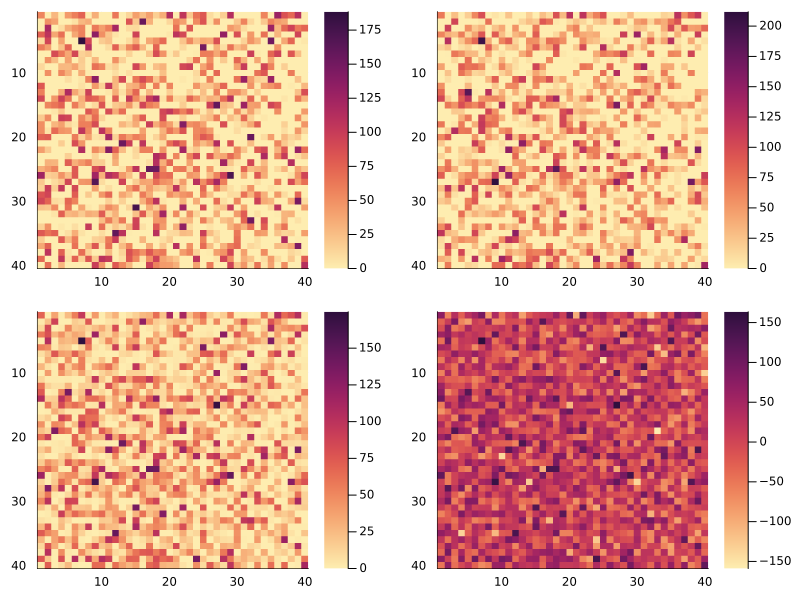

In [279]:
fcn_plot_heatmap = D -> D |> (x->fcn_reshape_lds(x, dims)) |>d->Plots.heatmap(d; colorbar=:best, yflip=true, dpi =600, size=(750,750), c = cgrad(:matter));
p1 = fcn_plot_heatmap(Wp[:,1])
p2 = fcn_plot_heatmap(Wp[:,2])
p3 = fcn_plot_heatmap(mean(Wp, dims=2))
p4 = fcn_plot_heatmap(X[b .== 0])
plot(p1,p2,p3,p4,layout=(2,2),size=(800,600))


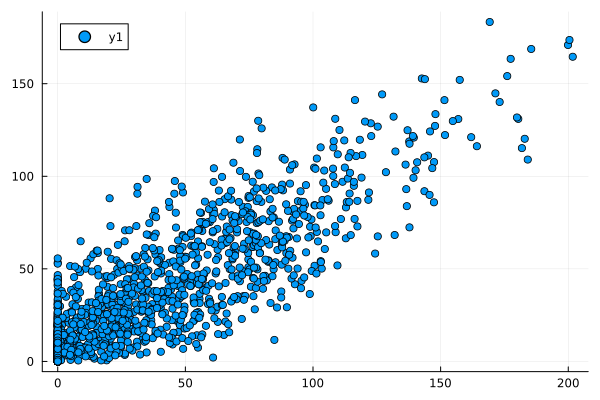

In [223]:
plot(Wp[:,2], mean(Wp, dims=2), seriestype = :scatter)

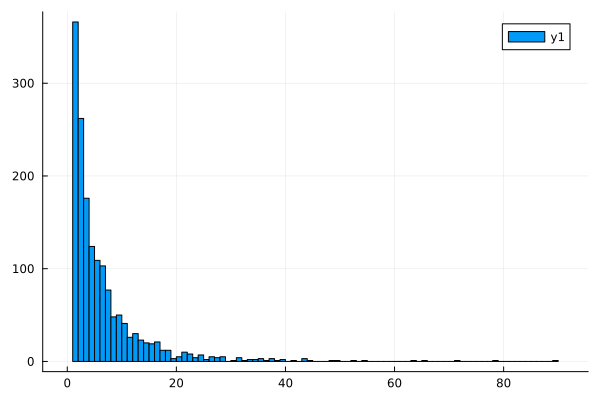

In [11]:
a = [];
histogram(L.shock_df.shock_size)
#map(Vector(L.ss'), (v) -> push!(a, v))

1601-element Vector{Float64}:
 0.0
 1.0
 1.0
 2.0
 2.0
 0.0
 0.0
 0.0
 1.0
 3.0
 2.0
 0.0
 0.0
 ⋮
 1.0
 3.0
 0.0
 2.0
 2.0
 4.0
 1.0
 1.0
 0.0
 0.0
 0.0
 0.0

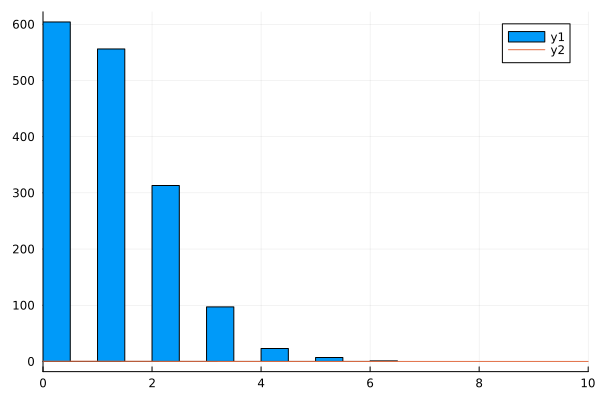

In [39]:
using StatsPlots
dist = Binomial(1600, 1/1600)
#p = histogram(L.nss)
#plot!(p, dist)
pdf_y = map(x->pdf(dist,x), 0:1:100)
p = histogram(L.nss, mode = :density)
plot!(p, 0:1:100, pdf_y, xlims = (0,10))

In [281]:
dims = (40,40)
W, P, b = fcn_spatial_weights(dims; boundary = 1, distance = true, bandwidth = 20,  α=2);
W = W[b .== 0, b .== 0]

1600×1600 SparseMatrixCSC{Float64, Int64} with 1235740 stored entries:
⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣷⣷⣷⣄⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀
⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣷⣄⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀
⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣷⣄⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀
⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣷⣄⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀
⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣷⣄⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀
⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣷⣄⠀⠀⠀⠀⠀⠀⠀⠀
⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣷⣄⠀⠀⠀⠀⠀⠀
⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣷⣄⠀⠀⠀⠀
⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣷⣄⠀⠀
⢽⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣷⣄
⠙⢿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣗
⠀⠀⠙⢿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿
⠀⠀⠀⠀⠙⢿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿
⠀⠀⠀⠀⠀⠀⠙⢿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿
⠀⠀⠀⠀⠀⠀⠀⠀⠙⢿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿
⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠙⢿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿
⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠙⢿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿
⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠙⢿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿
⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠙⢿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿
⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠙⢿⢿⢿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿

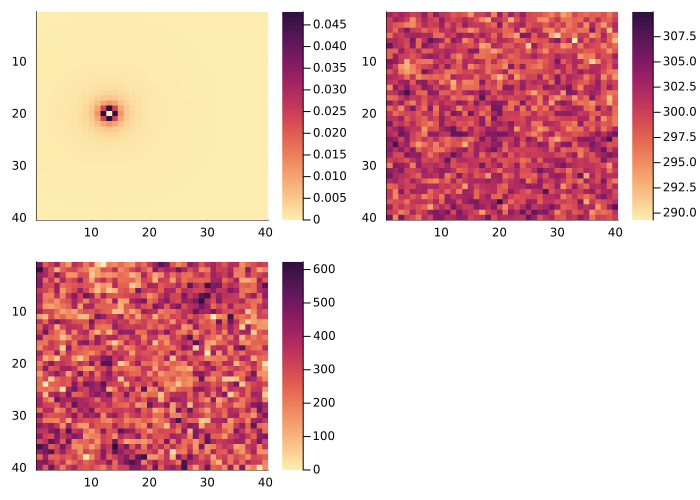

In [282]:
p1 = fcn_plot_heatmap(Vector(W[:, 500]));
p2 = fcn_plot_heatmap(mean(L.RV, dims = 2))
p3 = fcn_plot_heatmap(Vector(L.RV[:,10]));
Plots.plot(p1, p2, p3, size=(700,500), layout = (2,2))

In [284]:
out_mat = hcat(repeat(1:dims[1], inner=dims[2]), repeat(1:dims[1], outer=dims[2]), Vector(W[:, 500]), mean(L.RV, dims = 2), Vector(L.RV[:,10]));
out_tab = DataFrame(out_mat, :auto)
rename!(out_tab, :x1 => :x, :x2 => :y)
CSV.write("../../output/spatial_weights.csv", out_tab)

"../../output/spatial_weights.csv"

In [ ]:
using Distributions, Plots, StatsPlots

L = fcn_generate_landscape(yy = 10)
histogram(L.nss)


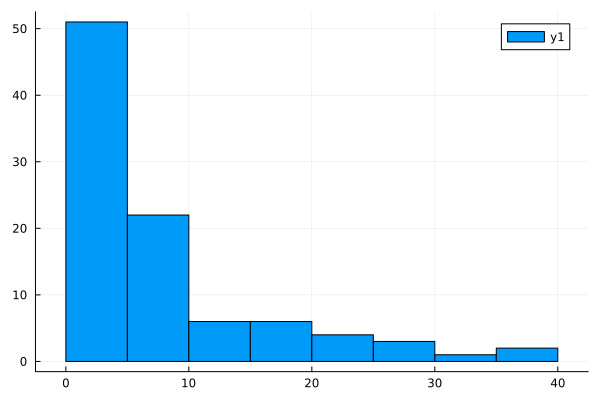

In [15]:
using Distributions, Plots
dist = TDist(3)
realisations = rand(dist, 160000)
p = 1/(40*40)
threshold = quantile(dist, 1-p)
exceedance = realisations .- threshold
exceedance = exceedance[exceedance .> 0]
histogram(exceedance)

In [ ]:
W, P, b = fcn_spatial_weights(dims; boundary = 1, distance = true, bandwidth = 20,  α=2);
X    = rand(Normal(), size(W,1));
Wp   = fcn_spatial_AR(W, S; X = X, γ=0.9, θ=0.3, σ=10);
fcn_plot_heatmap(Wp[b .== 0,20])

In [135]:
result = map(i -> fcn_mc_sim(i), 1:2);

Completed run 1
Completed run 2


In [149]:
q=2
max_ce_id_mstd = map(i -> findmax(i)[2][2], result[q].ce.mstd)
max_ce_id_cvar = map(i -> findmax(i)[2][2], result[q].ce.cvar)
contiguity_mstd = zeros(length(max_ce_id_mstd));
contiguity_cvar = zeros(length(max_ce_id_cvar));

for (i,x)=enumerate(max_ce_id_mstd)
    contiguity_mstd[i] = result[q].ef.mstd.solutions[:,x]' * result[q].L.W * result[q].ef.mstd.solutions[:,x]
end

for (i,x)=enumerate(max_ce_id_cvar)
    contiguity_cvar[i] = result[q].ef.cvar.solutions[:,x]' * result[q].L.W * result[q].ef.cvar.solutions[:,x]
end

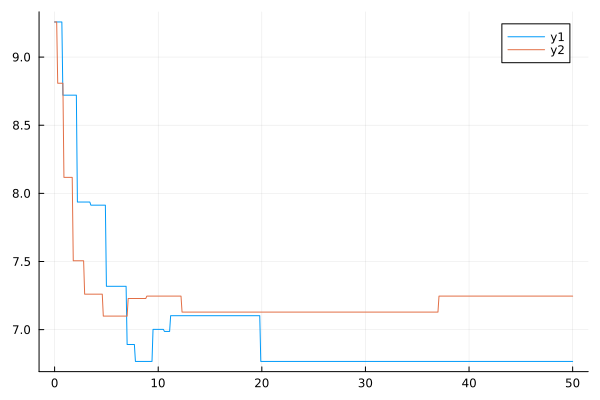

In [150]:
α=0:0.1:50
plot(α, contiguity_cvar)
plot!(α, contiguity_mstd)

In [166]:
(result[q].L.SS)' * (result[q].ef.mstd.solutions[:,1]) .> 25

1601-element BitVector:
 0
 0
 0
 0
 0
 0
 0
 0
 0
 0
 0
 0
 0
 ⋮
 0
 0
 0
 0
 0
 0
 0
 0
 0
 0
 0
 0

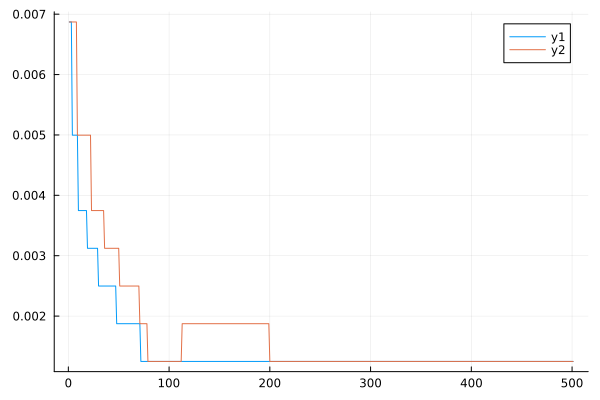

In [215]:
Q = 1:2
likelihood_shock_mstd = zeros(length(max_ce_id_mstd), length(Q));
likelihood_shock_cvar = zeros(length(max_ce_id_cvar), length(Q));
threshold = 60;
for q=Q
    for (i,x)=enumerate(max_ce_id_mstd)
        likelihood_shock_mstd[i,q] = mean(((result[q].L.R .< 1e-5)' * result[q].ef.mstd.solutions[:,x]) .> threshold)
    end

    for (i,x)=enumerate(max_ce_id_cvar)
        likelihood_shock_cvar[i,q] = mean(((result[q].L.R .< 1e-5)' * result[q].ef.mstd.solutions[:,x]) .> threshold)
    end
end
plot(likelihood_shock_mstd[:,1])
plot!(likelihood_shock_cvar[:,1])

In [239]:
include("../functions/mc-sim-functions.jl")
#fcn_write_shock_exposure(result, "baseline")
fcn_write_contiguity(result, "baseline")

Set parameter Username
Academic license - for non-commercial use only - expires 2023-12-23
Set parameter Username
Academic license - for non-commercial use only - expires 2023-12-23


"/users/frankiecho/Documents/Github/lds-mc-julia/output/contiguity_baseline_2.csv"

In [194]:
sum(result[q].L.R .< 1e-5, dims = 1)

1×1601 Matrix{Int64}:
 666  336  757  769  811  569  1046  …  957  807  574  704  799  774  703

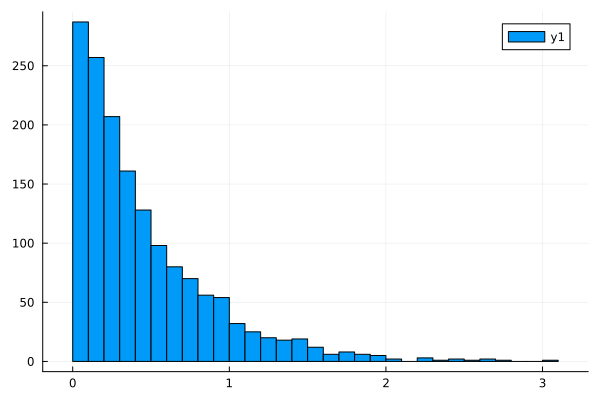

In [81]:
dist = Distributions.TDist(20);
realisations = rand(dist, 160000);
threshold = quantile(dist, 1-0.01);
exceedance = realisations .- threshold
histogram(exceedance[exceedance .> 0])
